# Meteo: Air temperature (TA)

**Author**: Lukas Hörtnagl (holukas@ethz.ch)

# Variable

In [21]:
varname = 'TA_T1_47_1_gfXG'
var = "TA"  # Name shown in plots
units = "°C"

# Imports

In [22]:
import importlib.metadata
import warnings
from datetime import datetime
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import diive as dv
from diive.core.io.files import save_parquet, load_parquet
from diive.core.plotting.cumulative import CumulativeYear
from diive.core.plotting.bar import LongtermAnomaliesYear

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


# Load data

In [23]:
SOURCEDIR = r"../10_METEO"
FILENAME = r"12.3_METEO_GAPFILLED_2004-2024.parquet"
FILEPATH = Path(SOURCEDIR) / FILENAME
df = load_parquet(filepath=FILEPATH)
keeplocs = (df.index.year >= 2005) & (df.index.year <= 2024)
df = df[keeplocs].copy()
df

Loaded .parquet file ..\10_METEO\12.3_METEO_GAPFILLED_2004-2024.parquet (0.024 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


LW_IN_T1_47_1  PA_T1_47_1  PPFD_IN_T1_47_1  RH_T1_47_1  SW_IN_T1_47_1  TA_T1_47_1  SW_IN_T1_47_1_gfXG  TA_T1_47_1_gfXG  PPFD_IN_T1_47_1_gfXG
TIMESTAMP_MIDDLE                                                                                                                                                 
2005-01-01 00:15:00            NaN         NaN              0.0   96.203705            0.0   -2.160000                 0.0        -2.160000                   0.0
2005-01-01 00:45:00            NaN         NaN              0.0   98.003701            0.0   -2.010000                 0.0        -2.010000                   0.0
2005-01-01 01:15:00            NaN         NaN              0.0   98.203705            0.0   -1.791000                 0.0        -1.791000                   0.0
2005-01-01 01:45:00            NaN         NaN              0.0   98.203705            0.0   -1.539000                 0.0        -1.539000                   0.0
2005-01-01 02:15:00            NaN         NaN              0.0   98.203705            0.0   -1.338000                 0.0        -1.338000                   0.0
...                            ...         ...              ...         ...            ...         ...                 ...              ...                   ...
2024-12-31 21:45:00     232.595527   94.211806              0.0   87.254008            0.0   -0.504794                 0.0        -0.504794                   0.0
2024-12-31 22:15:00     232.609777   94.189013              0.0   87.430236            0.0   -0.296828                 0.0        -0.296828                   0.0
2024-12-31 22:45:00     232.345020   94.169525              0.0   89.787920            0.0   -0.392922                 0.0        -0.392922                   0.0
2024-12-31 23:15:00     234.211100   94.168413              0.0   81.809355            0.0    0.792661                 0.0         0.792661                   0.0
2024-12-31 23:45:00     231.760533   94.170793              0.0   88.311314            0.0   -0.422600                 0.0        -0.422600                   0.0

[350640 rows x 9 columns]

In [24]:
series = df[varname].copy()
series

TIMESTAMP_MIDDLE
2005-01-01 00:15:00   -2.160000
2005-01-01 00:45:00   -2.010000
2005-01-01 01:15:00   -1.791000
2005-01-01 01:45:00   -1.539000
2005-01-01 02:15:00   -1.338000
                         ...   
2024-12-31 21:45:00   -0.504794
2024-12-31 22:15:00   -0.296828
2024-12-31 22:45:00   -0.392922
2024-12-31 23:15:00    0.792661
2024-12-31 23:45:00   -0.422600
Freq: 30min, Name: TA_T1_47_1_gfXG, Length: 350640, dtype: float64

In [25]:
xlabel = f"{var} ({units})"
xlim = [series.min(), series.max()]

</br>

# Stats

## Overall mean

In [26]:
_yearly_avg = series.resample('YE').mean()
_overall_mean = _yearly_avg.mean()
_overall_sd = _yearly_avg.std()
print(f"Overall mean: {_overall_mean} +/- {_overall_sd}")

Overall mean: 8.9549543810582 +/- 1.3482554138577252


## Yearly means

In [27]:
ym = series.resample('YE').mean()
ym

TIMESTAMP_MIDDLE
2005-12-31     7.429217
2006-12-31     7.960293
2007-12-31     8.109144
2008-12-31     7.588395
2009-12-31     7.948623
2010-12-31     6.803609
2011-12-31     8.786543
2012-12-31     7.823660
2013-12-31     7.106809
2014-12-31     8.703434
2015-12-31     8.736166
2016-12-31     9.558060
2017-12-31     9.759068
2018-12-31    10.702271
2019-12-31    10.291331
2020-12-31    10.504883
2021-12-31     9.056597
2022-12-31    11.120893
2023-12-31    10.765006
2024-12-31    10.345086
Freq: YE-DEC, Name: TA_T1_47_1_gfXG, dtype: float64

In [28]:
ym.sort_values(ascending=False)

TIMESTAMP_MIDDLE
2022-12-31    11.120893
2023-12-31    10.765006
2018-12-31    10.702271
2020-12-31    10.504883
2024-12-31    10.345086
2019-12-31    10.291331
2017-12-31     9.759068
2016-12-31     9.558060
2021-12-31     9.056597
2011-12-31     8.786543
2015-12-31     8.736166
2014-12-31     8.703434
2007-12-31     8.109144
2006-12-31     7.960293
2009-12-31     7.948623
2012-12-31     7.823660
2008-12-31     7.588395
2005-12-31     7.429217
2013-12-31     7.106809
2010-12-31     6.803609
Name: TA_T1_47_1_gfXG, dtype: float64

## Monthly averages

In [29]:
seriesdf = pd.DataFrame(series)
seriesdf['MONTH'] = seriesdf.index.month
seriesdf['YEAR'] = seriesdf.index.year
monthly_avg = seriesdf.groupby(['YEAR', 'MONTH'])[varname].mean().unstack()
monthly_avg

MONTH        1         2         3          4          5          6          7          8          9          10        11        12
YEAR                                                                                                                                
2005  -1.798928 -3.298467  3.613463   7.327779  11.914164  16.726858  16.591920  14.460255  13.816814   9.833265  2.185859 -2.926974
2006  -4.194532 -2.299361  0.443276   6.594224  11.012580  16.028185  21.033602  12.454961  15.517356  11.289903  6.052256  0.996613
2007   1.831280  2.950667  3.866424  12.747250  12.409842  14.977545  15.420882  15.238803  11.221396   7.458473  0.789296 -1.865884
2008   1.498027  2.287706  1.880655   5.617952  13.469550  15.097302  16.143572  15.790118  10.281068   7.840179  2.565744 -1.649615
2009  -3.974498 -1.601780  1.854548  10.023973  13.505490  14.196945  16.561570  18.342514  13.991227   7.741110  5.356225 -1.158283
2010  -4.242044 -1.379788  2.465842   8.187206   9.017224  15.094503  18.229335  15.085477  11.608217   7.024903  2.883811 -2.782696
2011  -0.923986  1.041491  4.759064  11.375054  13.705819  14.686286  14.439601  17.685672  14.965174   7.767536  4.262686  1.251798
2012  -0.385405 -5.501142  7.017484   6.471191  12.224344  15.266384  15.645665  17.539556  12.566301   8.192080  4.585683 -0.352892
2013  -1.854887 -3.664084  0.365234   6.492476   8.224684  13.956154  19.142624  16.977072  12.762685   9.517883  1.539382  0.984121
2014   1.166215  1.926494  5.892282   8.911640  10.221405  16.247756  15.719818  14.138015  13.661444  10.812444  4.943577  0.433012
2015  -0.440557 -2.097140  4.544967   8.231290  11.547104  15.871719  20.327214  18.712603  11.211259   6.926023  5.430528  3.707700
2016   0.890098  2.837591  4.041670   8.268441  12.593452  15.919292  19.398752  19.365958  17.255841   8.328448  4.340064  1.267124
2017  -3.730232  3.588457  8.196496   8.314217  14.401430  19.210224  18.936156  19.645432  12.807543  11.445372  3.735386  0.123475
2018   3.651935 -2.672235  3.066301  13.204716  14.698813  17.746751  20.973403  20.693080  16.709867  11.710273  5.212166  2.462536
2019  -0.989104  4.319631  6.510257   8.886606  10.056998  19.499712  20.484599  19.035565  14.931494  11.209238  6.008235  3.228077
2020   2.249733  5.005212  5.196607  12.761152  13.198056  15.644990  19.662248  19.723812  16.071764   8.949485  5.625622  1.875873
2021  -0.506040  4.147604  5.117351   7.316763   9.631604  18.450182  17.368270  16.548159  16.255653   9.689530  2.887954  1.577205
2022   0.922858  3.473913  7.477323   8.347545  15.615285  19.285291  21.095167  20.425183  13.606485  14.086912  6.538461  1.942527
2023   1.527202  3.165265  6.046677   6.899131  13.109495  19.705106  19.507541  19.522261  18.653598  13.107932  4.396678  3.016453
2024   1.331627  5.929059  7.444291   9.292731  12.905508  16.810613  19.461952  20.934985  13.727278  11.096496  4.329863  0.681400

## Number of days below 0°C

TA_T1_47_1_gfXG  YEAR
TIMESTAMP_MIDDLE                       
2005                          112  2005
2006                          109  2006
2007                           81  2007
2008                          100  2008
2009                          107  2009
2010                          116  2010
2011                           83  2011
2012                           91  2012
2013                          128  2013
2014                           76  2014
2015                           87  2015
2016                           83  2016
2017                           82  2017
2018                           67  2018
2019                           61  2019
2020                           59  2020
2021                           83  2021
2022                           63  2022
2023                           60  2023
2024                           50  2024

Average per year: 84.9 +/- 21.63 SD


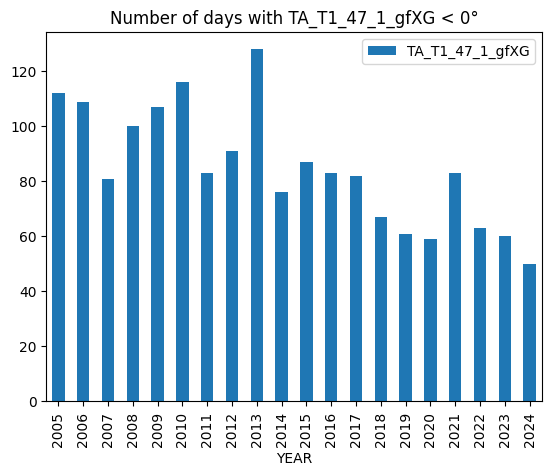

In [30]:
plotdf = df[[varname]].copy()
plotdf = plotdf.resample('D').min()
belowzero = plotdf.loc[plotdf[varname] < 0].copy()
belowzero = belowzero.groupby(belowzero.index.year).count()
belowzero["YEAR"] = belowzero.index
belowzero
belowzero.plot.bar(x="YEAR", y=varname, title=f"Number of days with {varname} < 0°");
display(belowzero)
print(f"Average per year: {belowzero[varname].mean()} +/- {belowzero[varname].std():.2f} SD")

## Number of days above 30°C

TA_T1_47_1_gfXG  YEAR
TIMESTAMP_MIDDLE                       
2005                            1  2005
2006                            2  2006
2010                            2  2010
2011                            1  2011
2012                            1  2012
2013                            3  2013
2014                            1  2014
2015                            8  2015
2016                            5  2016
2017                            4  2017
2018                            8  2018
2019                            9  2019
2020                            4  2020
2022                           10  2022
2023                           10  2023
2024                            5  2024

Average per year: 4.625 +/- 3.36 SD


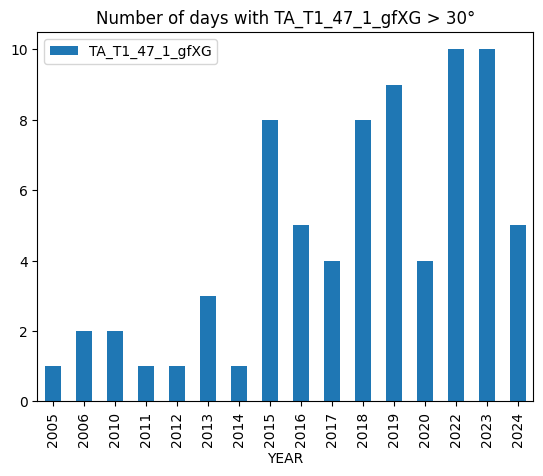

In [31]:
plotdf = df[[varname]].copy()
plotdf = plotdf.resample('D').max()
above = plotdf.loc[plotdf[varname] > 30].copy()
above = above.groupby(above.index.year).count()
above["YEAR"] = above.index
above.plot.bar(x="YEAR", y=varname, title=f"Number of days with {varname} > 30°");
display(above)
print(f"Average per year: {above[varname].mean()} +/- {above[varname].std():.2f} SD")

</br>

# Heatmap plots

## Half-hourly

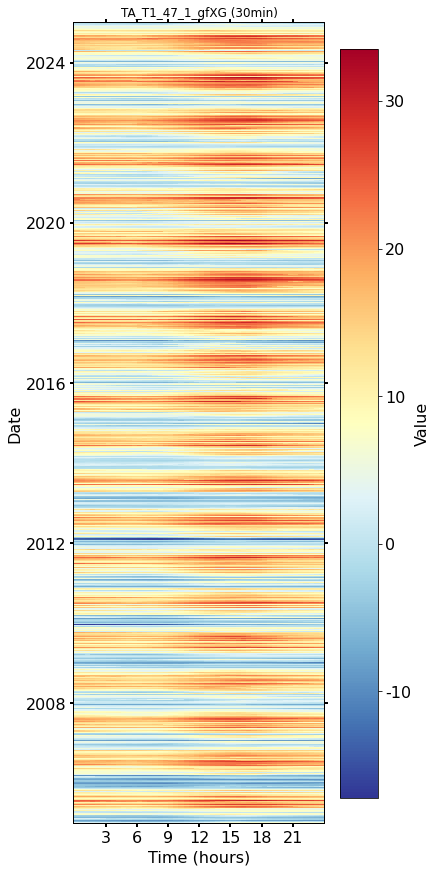

In [32]:
fig, axs = plt.subplots(ncols=1, figsize=(6, 12), dpi=72, layout="constrained")
dv.heatmapdatetime(series=series, ax=axs, cb_digits_after_comma=0).plot()

## Monthly

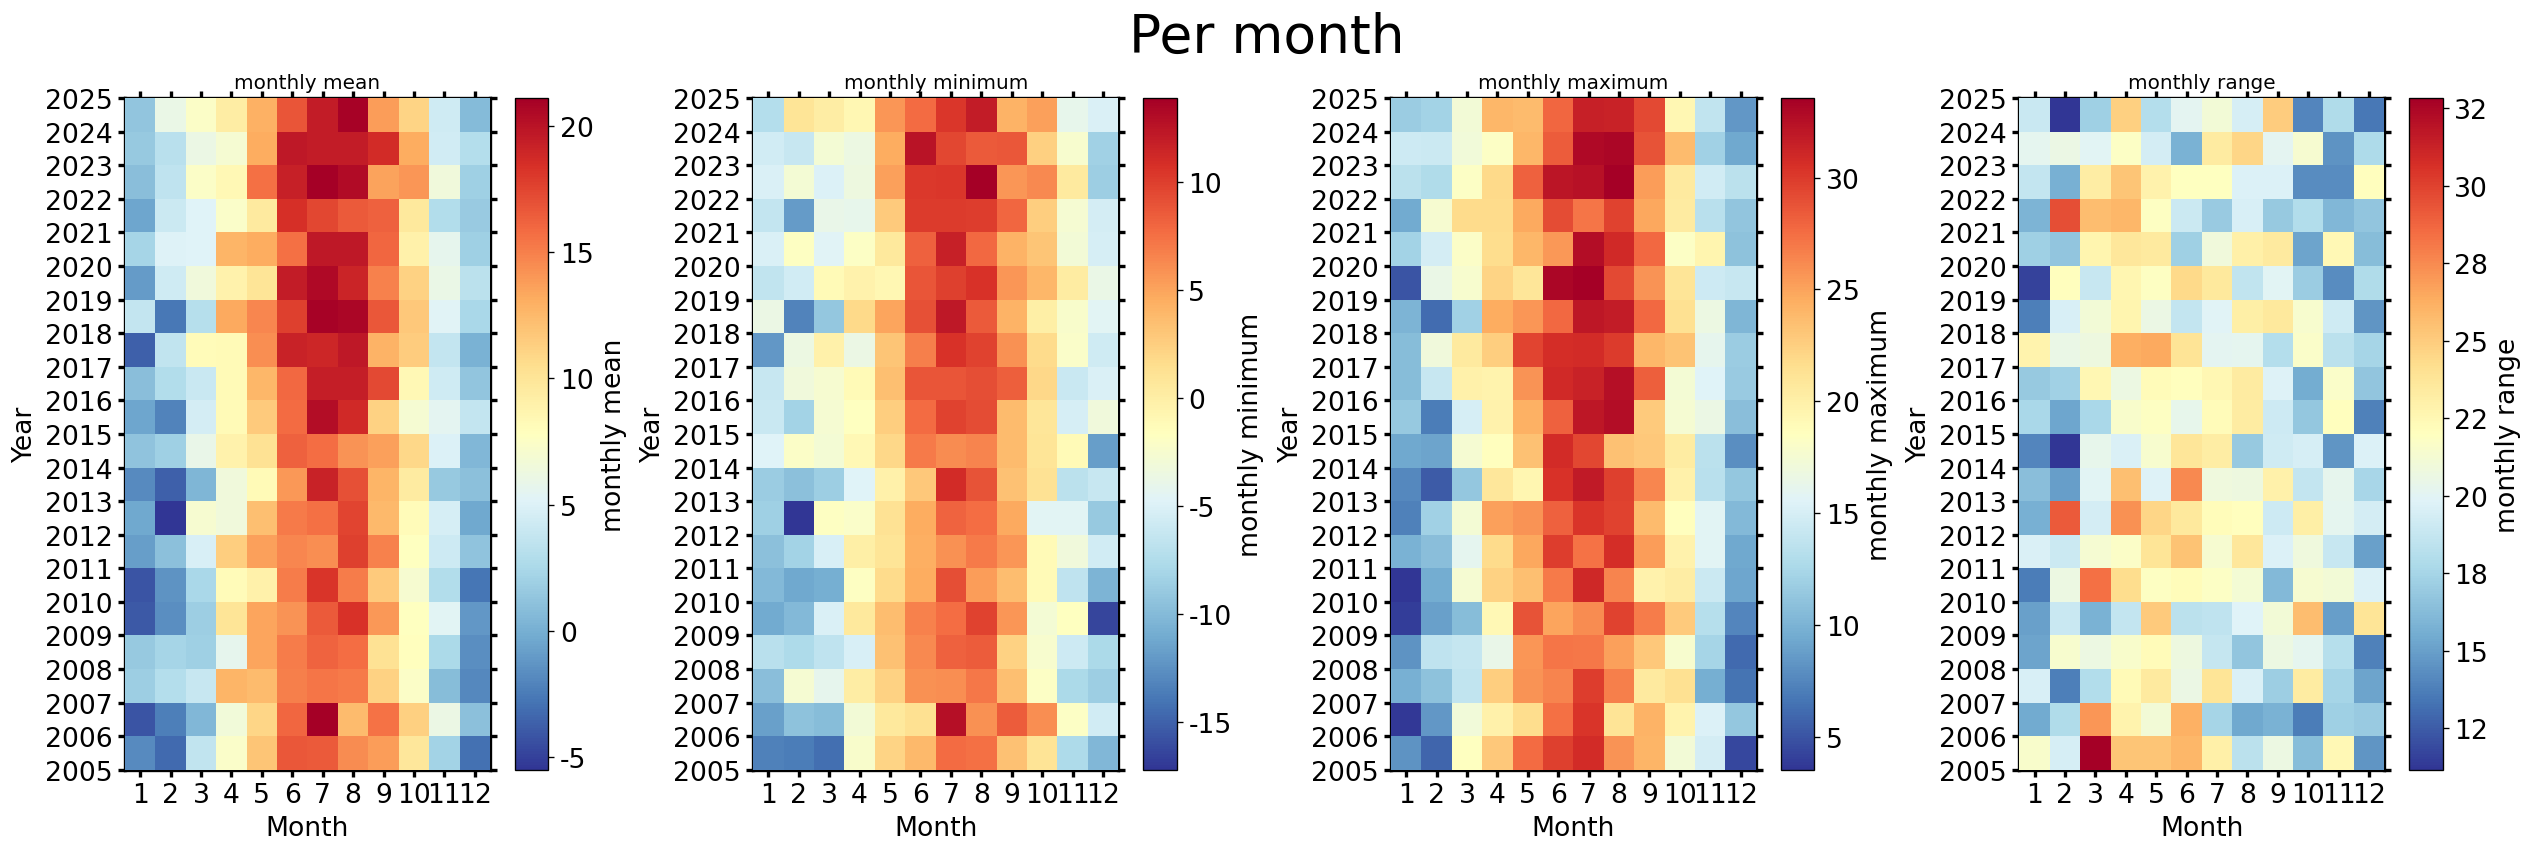

In [33]:
fig, axs = plt.subplots(ncols=4, figsize=(21, 7), dpi=120, layout="constrained")
fig.suptitle(f'Per month', fontsize=32)
dv.heatmapyearmonth(series_monthly=series.resample('M').mean(), title="monthly mean", ax=axs[0], cb_digits_after_comma=0, zlabel="monthly mean").plot()
dv.heatmapyearmonth(series_monthly=series.resample('M').min(), title="monthly minimum", ax=axs[1], cb_digits_after_comma=0, zlabel="monthly minimum").plot()
dv.heatmapyearmonth(series_monthly=series.resample('M').max(), title="monthly maximum", ax=axs[2], cb_digits_after_comma=0, zlabel="monthly maximum").plot()
_range = series.resample('M').max().sub(series.resample('M').min())
dv.heatmapyearmonth(series_monthly=_range, title="monthly range", ax=axs[3], cb_digits_after_comma=0, zlabel="monthly range").plot()

## Monthly ranks

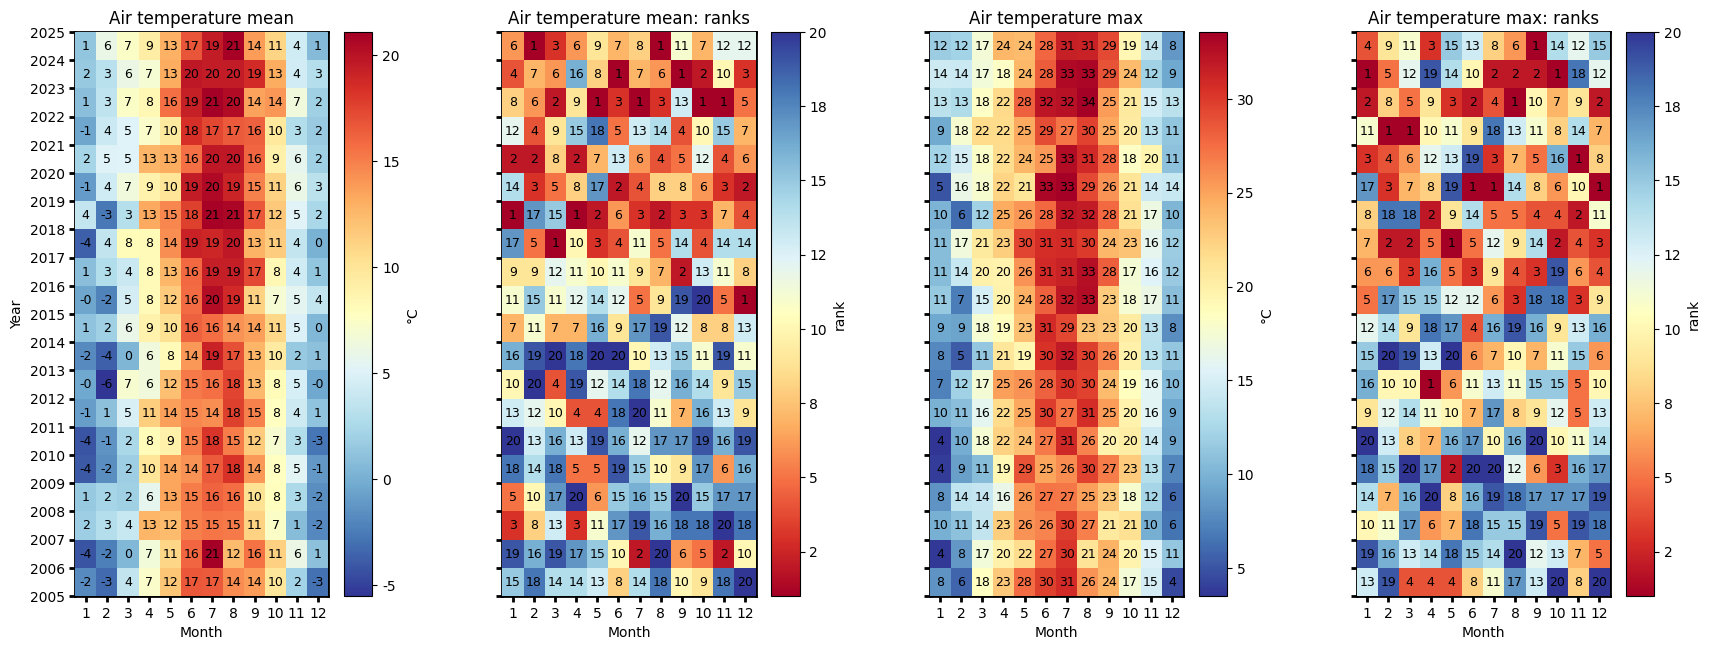

In [34]:
# Figure
fig = plt.figure(facecolor='white', figsize=(17, 6))

# Gridspec for layout
gs = gridspec.GridSpec(1, 4)  # rows, cols
gs.update(wspace=0.35, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax_mean = fig.add_subplot(gs[0, 0])
ax_mean_ranks = fig.add_subplot(gs[0, 1])
ax_max = fig.add_subplot(gs[0, 2])
ax_max_ranks = fig.add_subplot(gs[0, 3])
params = {'axlabels_fontsize': 10, 'ticks_labelsize': 10, 'cb_labelsize': 10}
dv.heatmapyearmonth_ranks(ax=ax_mean, series=series, agg='mean', ranks=False, zlabel="°C", cmap="RdYlBu_r", show_values=True, **params).plot()

hm_mean_ranks = dv.heatmapyearmonth_ranks(ax=ax_mean_ranks, series=series, agg='mean', show_values=True, **params)
hm_mean_ranks.plot()

dv.heatmapyearmonth_ranks(ax=ax_max, series=series, agg='max', ranks=False, zlabel="°C", cmap="RdYlBu_r", show_values=True, **params).plot()
dv.heatmapyearmonth_ranks(ax=ax_max_ranks, series=series, agg='max', show_values=True, **params).plot()

ax_mean.set_title("Air temperature mean", color='black')
ax_mean_ranks.set_title("Air temperature mean: ranks", color='black')
ax_max.set_title("Air temperature max", color='black')
ax_max_ranks.set_title("Air temperature max: ranks", color='black')

ax_mean.tick_params(left=True, right=False, top=False, bottom=True,
                    labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_mean_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                   labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

ax_mean_ranks.set_ylabel("")
ax_max.set_ylabel("")
ax_max_ranks.set_ylabel("")

fig.show()

### Mean ranks per year

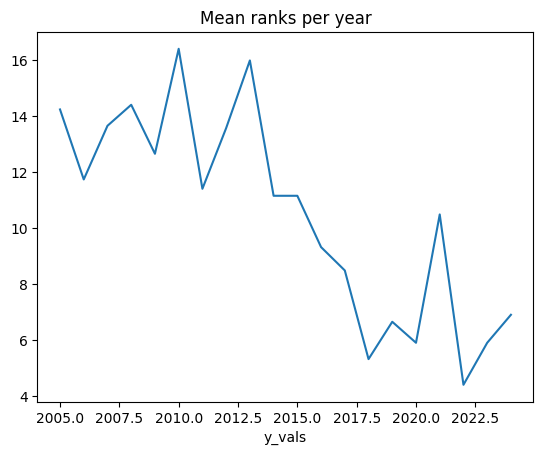

In [35]:
hm_mean_ranks.hm.get_plot_data().mean(axis=1).plot(title="Mean ranks per year");

</br>

# Ridgeline plots

## Yearly

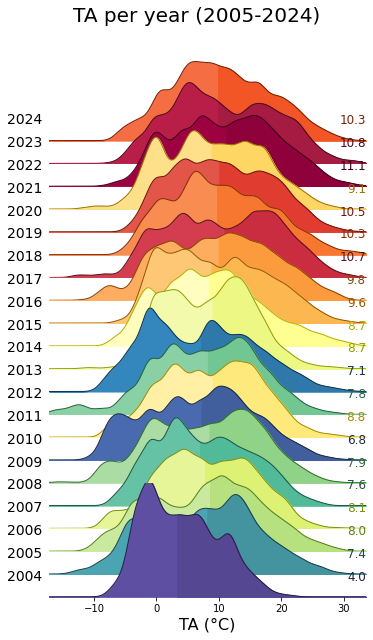

In [16]:
rp = dv.ridgeline(series=series)
rp.plot(
    how='yearly',
    kd_kwargs=None,  # params from scikit KernelDensity as dict
    xlim=xlim,  # min/max as list
    ylim=[0, 0.07],  # min/max as list
    hspace=-0.8,  # overlap between months
    xlabel=f"{var} ({units})",
    fig_width=5,
    fig_height=9,
    shade_percentile=0.5,
    show_mean_line=False,
    fig_title=f"{var} per year",
    fig_dpi=72,
    showplot=True,
    ascending=False
)

## Monthly

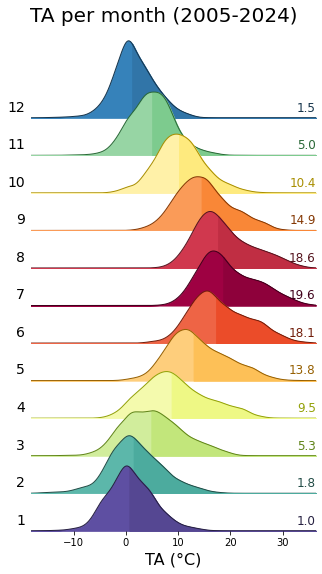

In [39]:
rp.plot(
    how='monthly',
    kd_kwargs=None,  # params from scikit KernelDensity as dict
    xlim=xlim,  # min/max as list
    ylim=[0, 0.14],  # min/max as list
    hspace=-0.6,  # overlap between months
    xlabel=f"{var} ({units})",
    fig_width=4.5,
    fig_height=8,
    shade_percentile=0.5,
    show_mean_line=False,
    fig_title=f"{var} per month (2005-2024)",
    fig_dpi=72,
    showplot=True,
    ascending=False
)

## Weekly

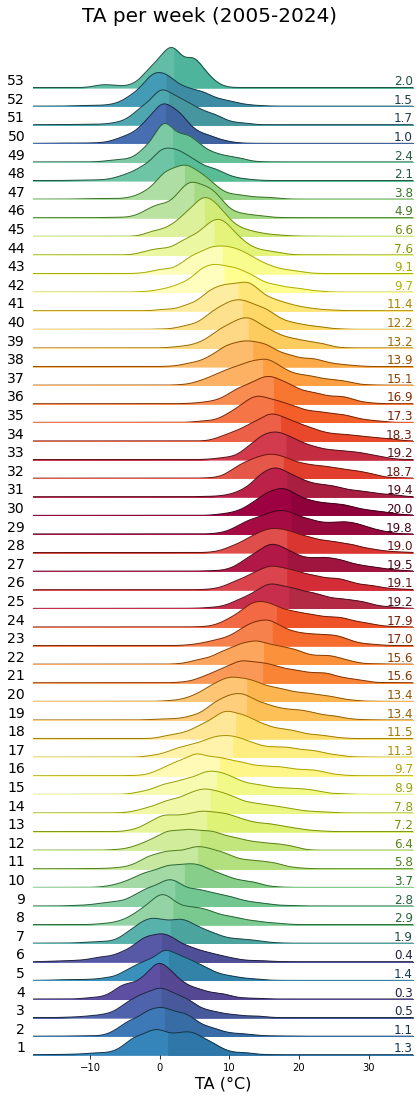

In [40]:
rp.plot(
    how='weekly',
    kd_kwargs=None,  # params from scikit KernelDensity as dict
    xlim=xlim,  # min/max as list
    ylim=[0, 0.15],  # min/max as list
    hspace=-0.6,  # overlap
    xlabel=f"{var} ({units})",
    fig_width=6,
    fig_height=16,
    shade_percentile=0.5,
    show_mean_line=False,
    fig_title=f"{var} per week (2005-2024)",
    fig_dpi=72,
    showplot=True,
    ascending=False
)

## Single years per month

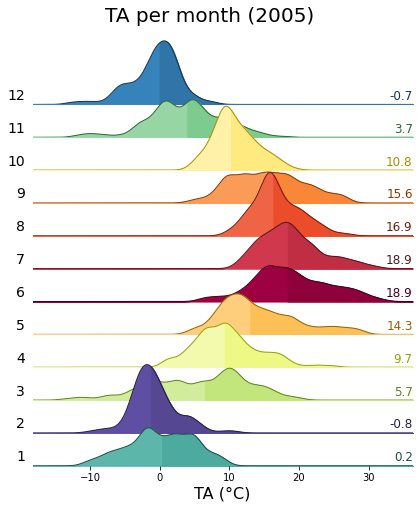

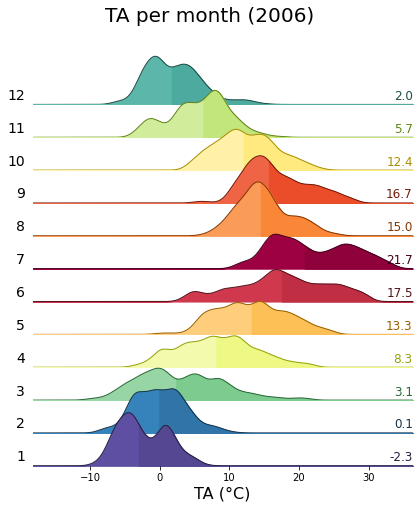

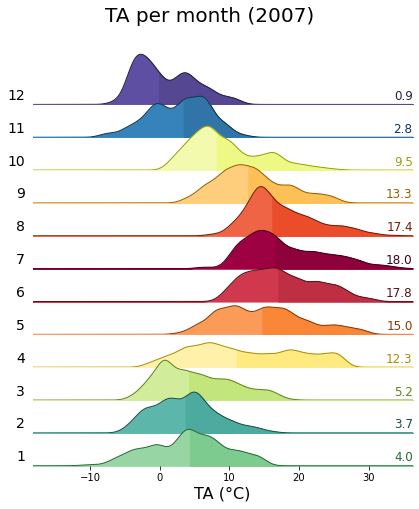

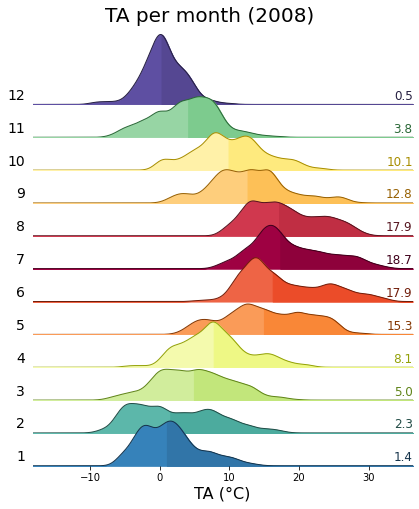

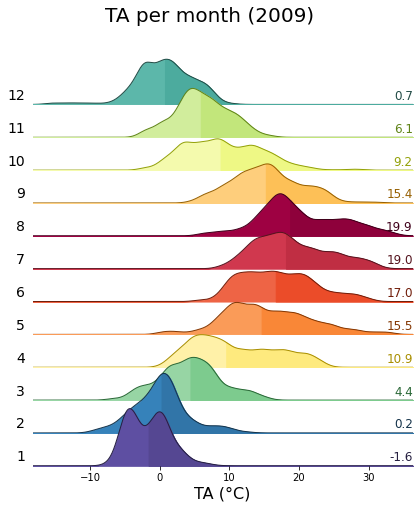

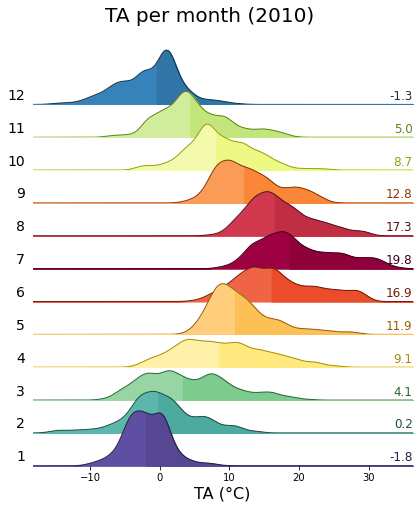

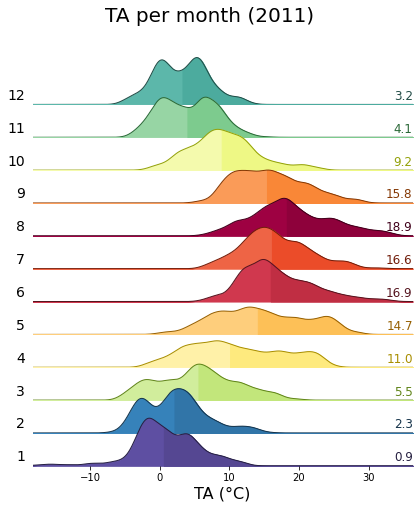

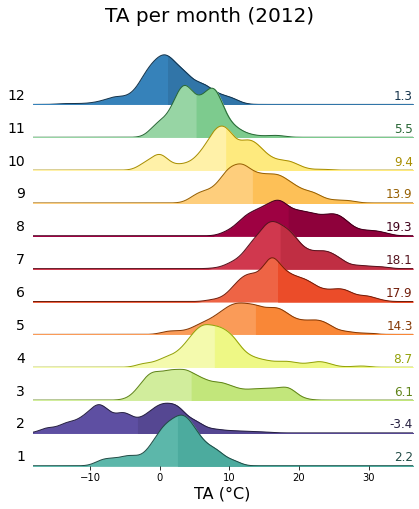

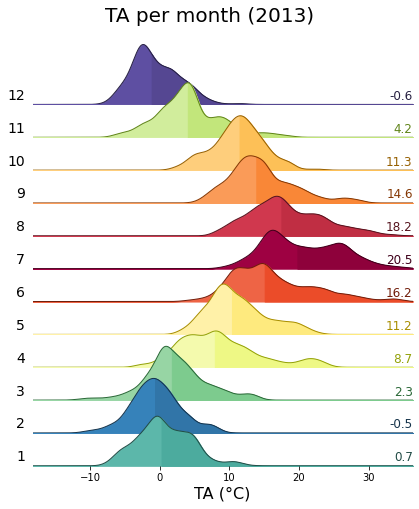

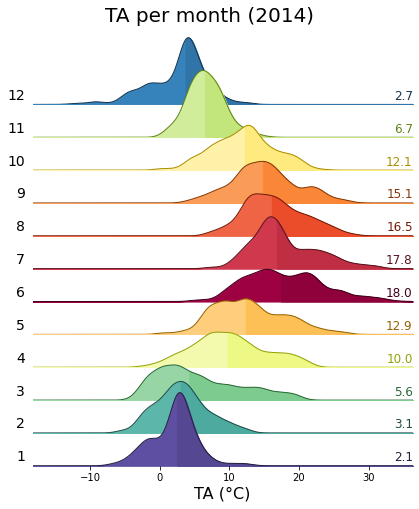

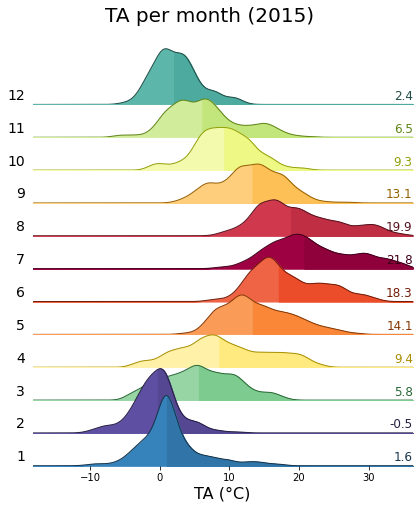

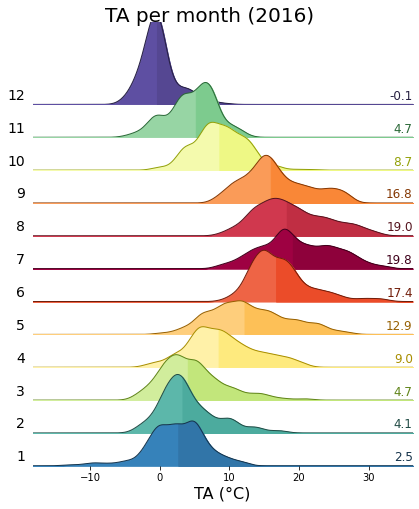

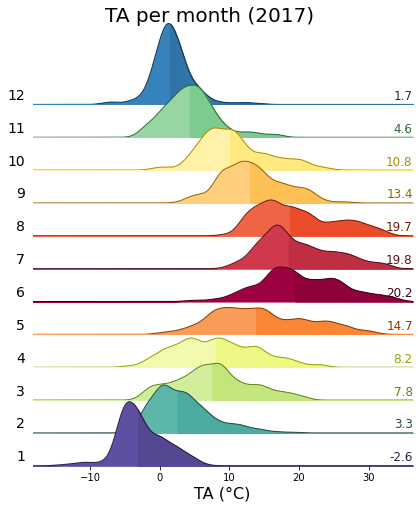

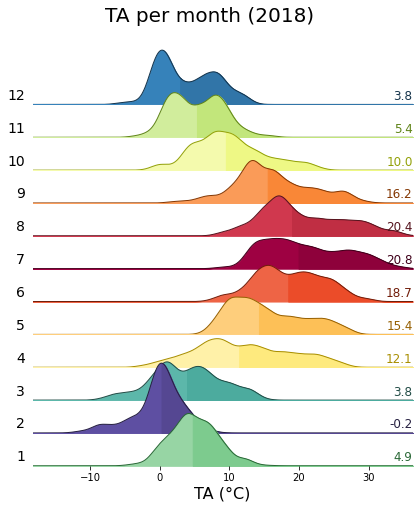

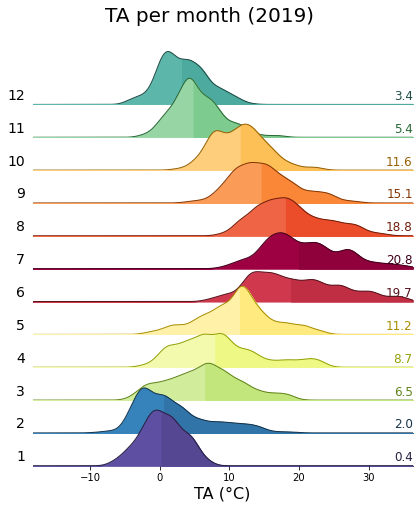

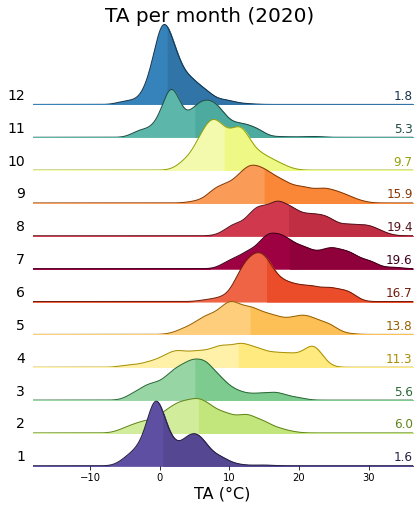

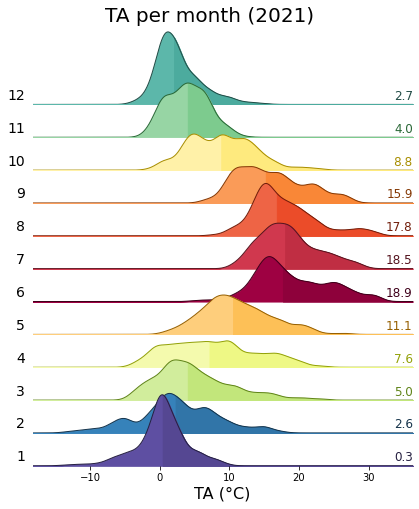

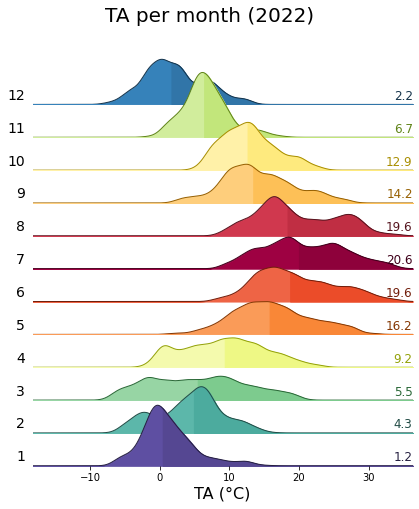

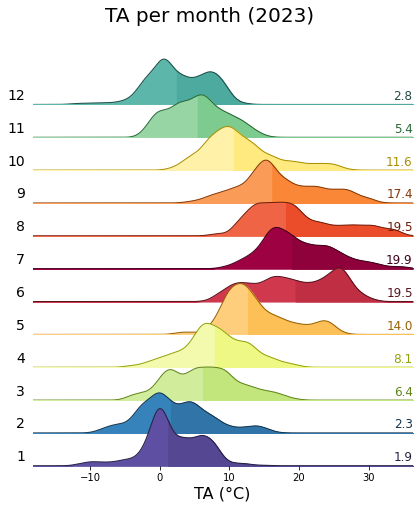

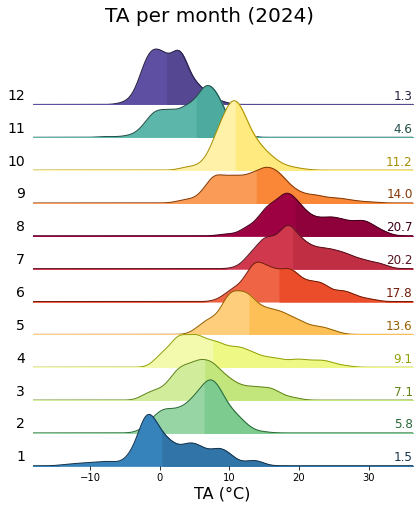

In [41]:
uniq_years = series.index.year.unique()
for uy in uniq_years:
    series_yr = series.loc[series.index.year == uy].copy()
    rp = dv.ridgeline(series=series_yr)
    rp.plot(
        how='monthly',
        kd_kwargs=None,  # params from scikit KernelDensity as dict
        xlim=xlim,  # min/max as list
        ylim=[0, 0.18],  # min/max as list
        hspace=-0.6,  # overlap
        xlabel=f"{var} ({units})",
        fig_width=6,
        fig_height=7,
        shade_percentile=0.5,
        show_mean_line=False,
        fig_title=f"{var} per month ({uy})",
        fig_dpi=72,
        showplot=True,
        ascending=False
    )

## Single years per week

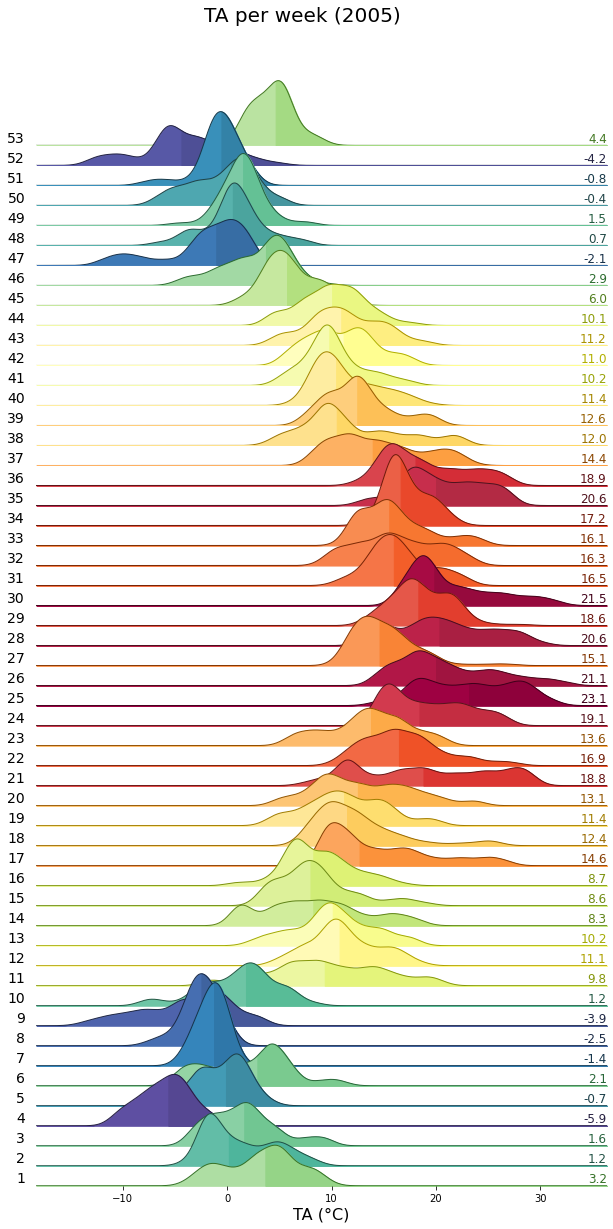

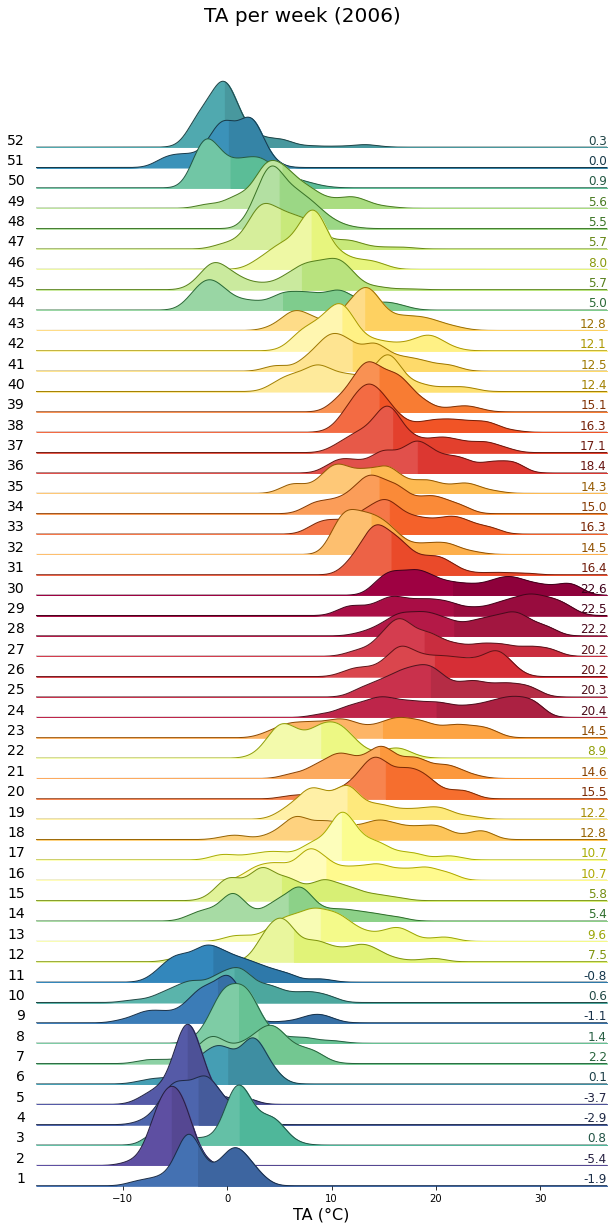

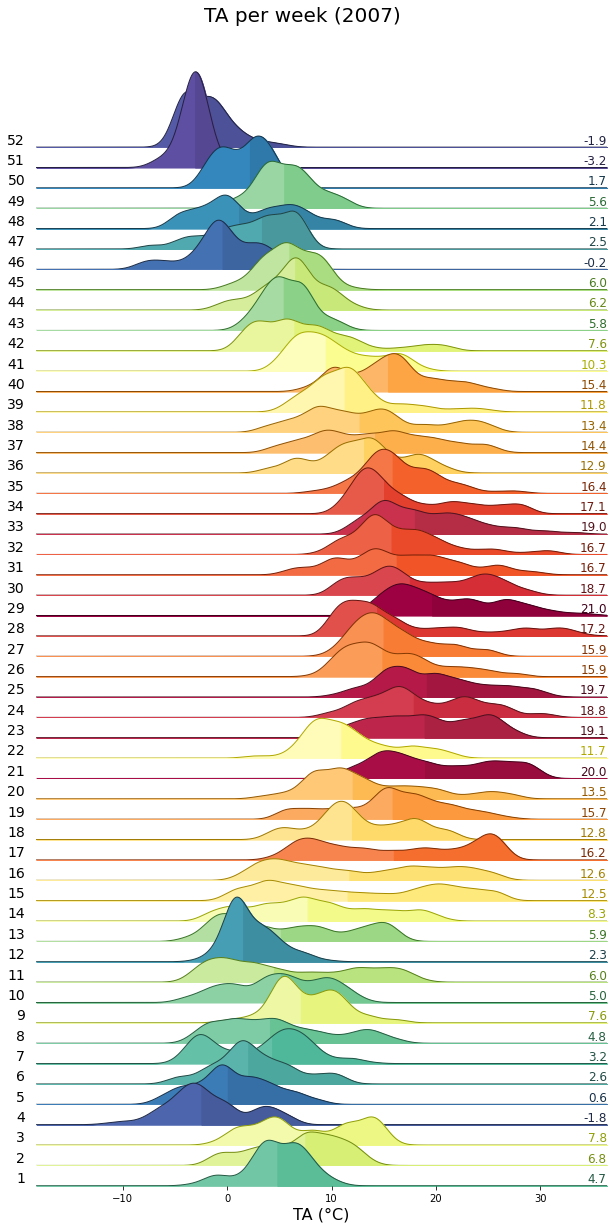

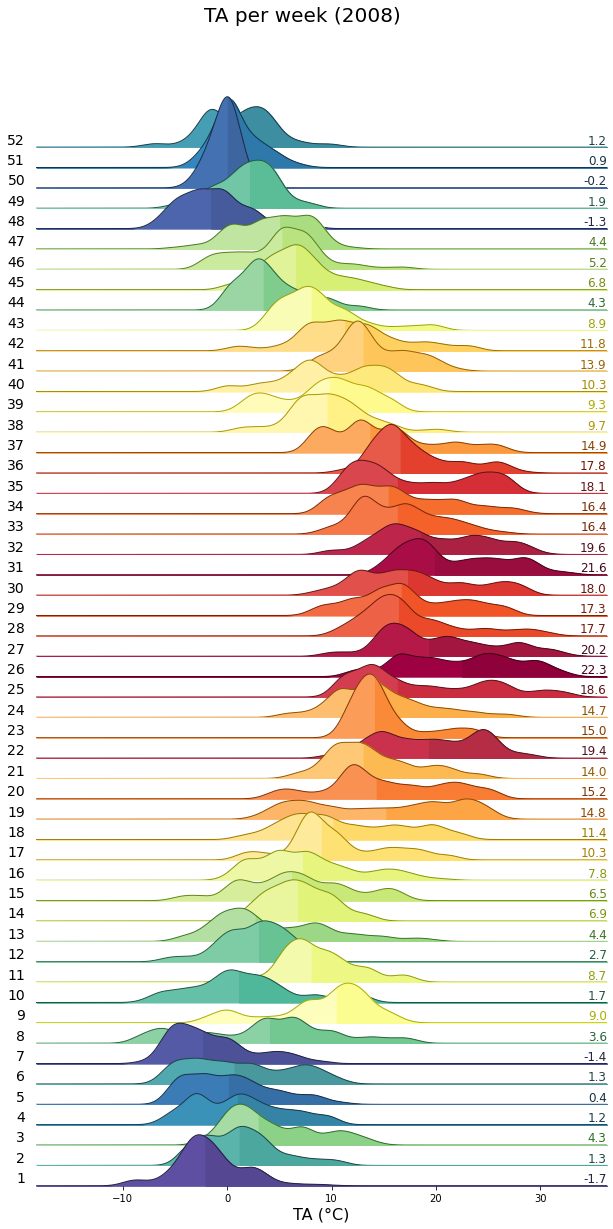

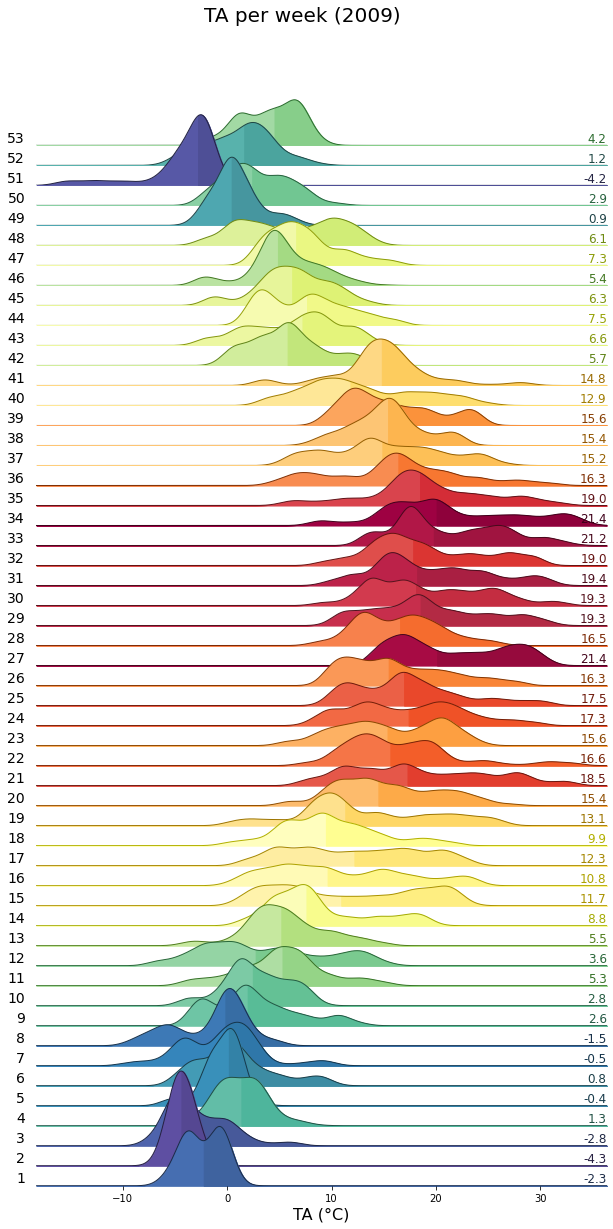

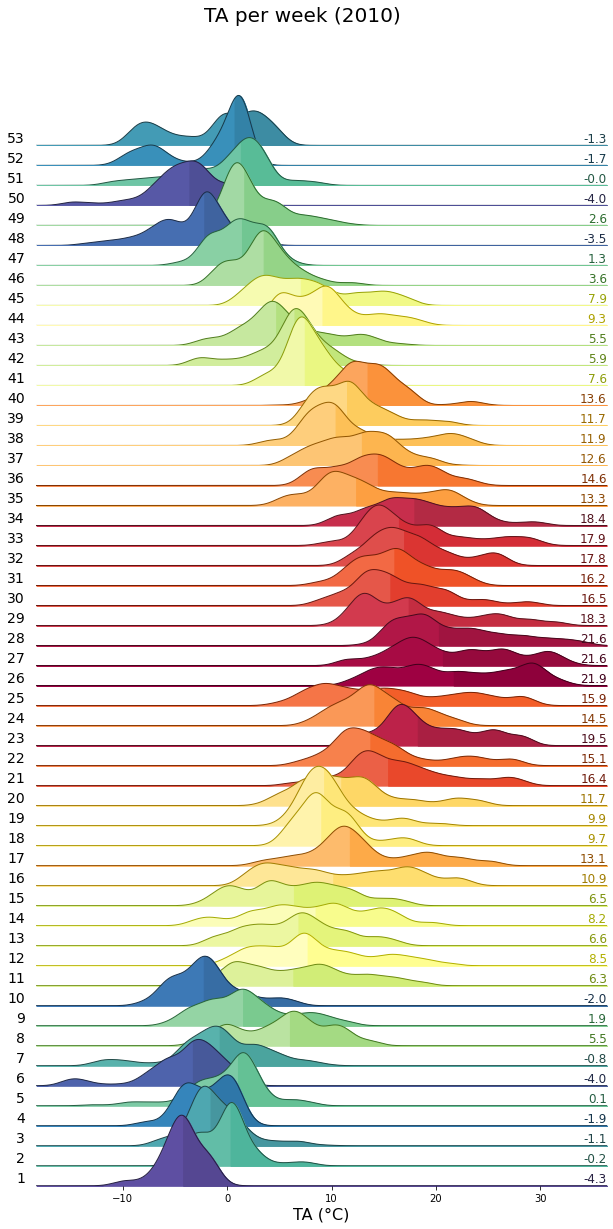

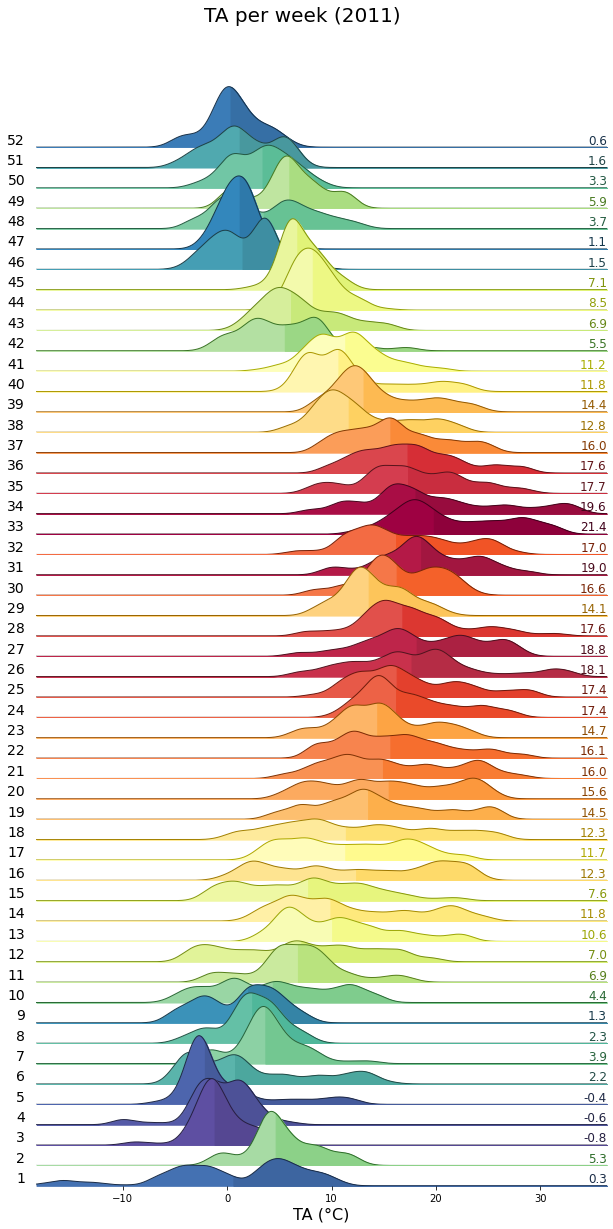

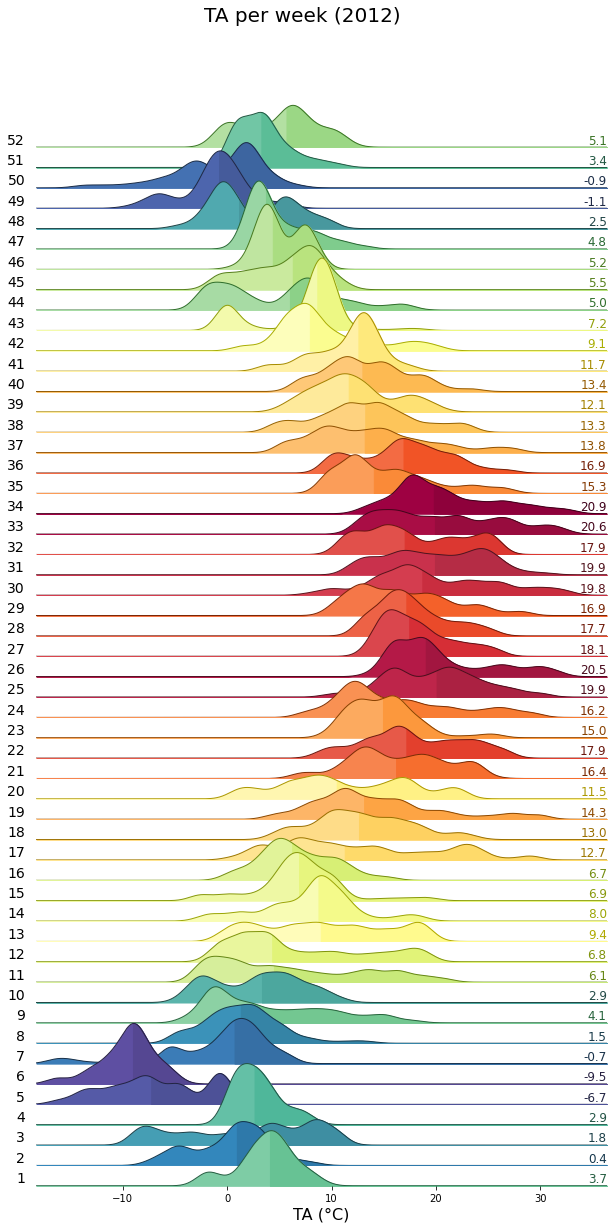

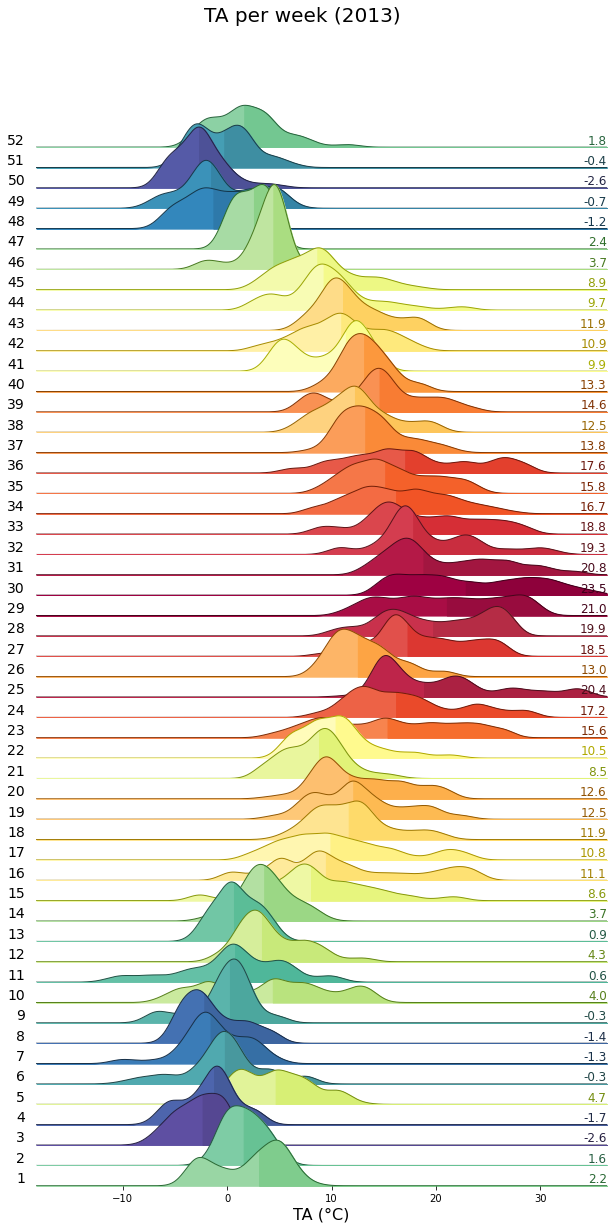

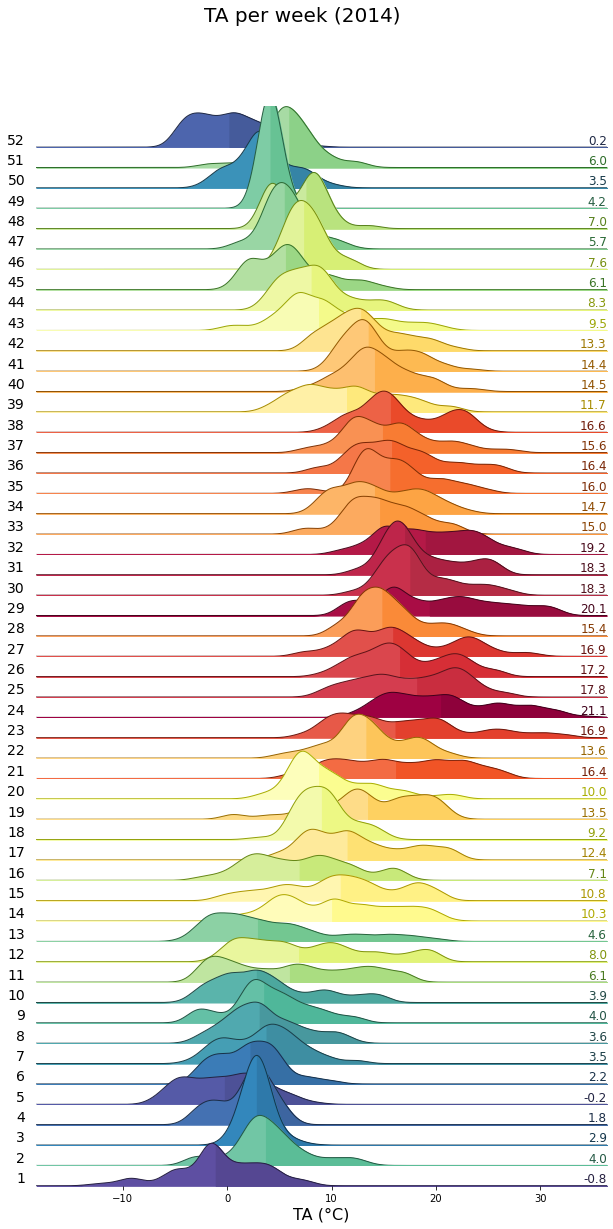

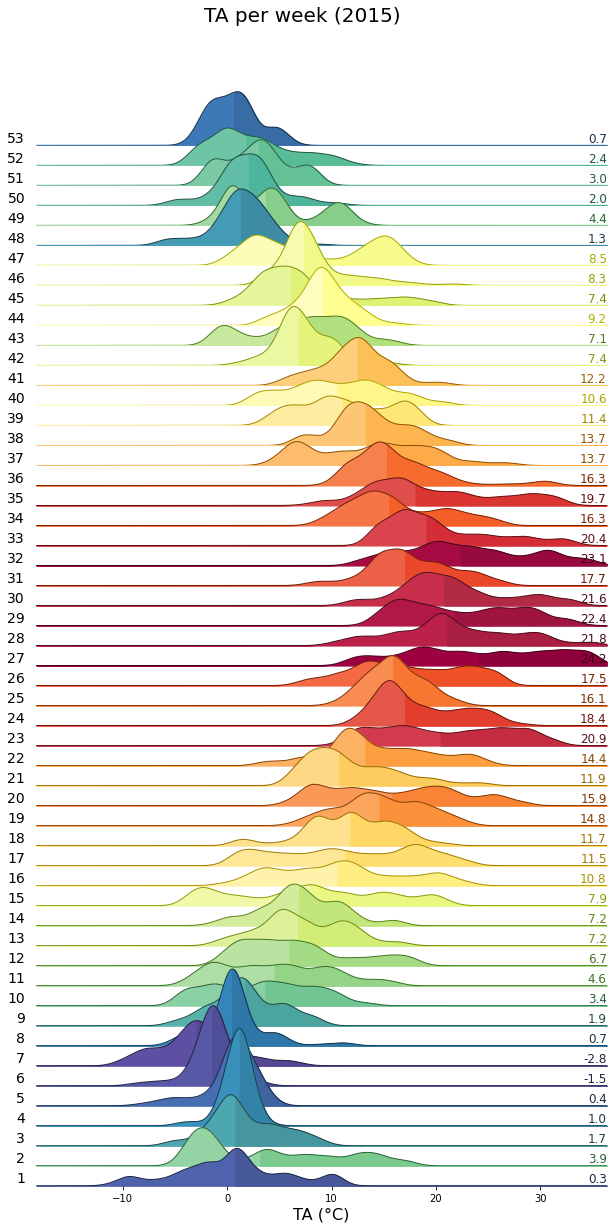

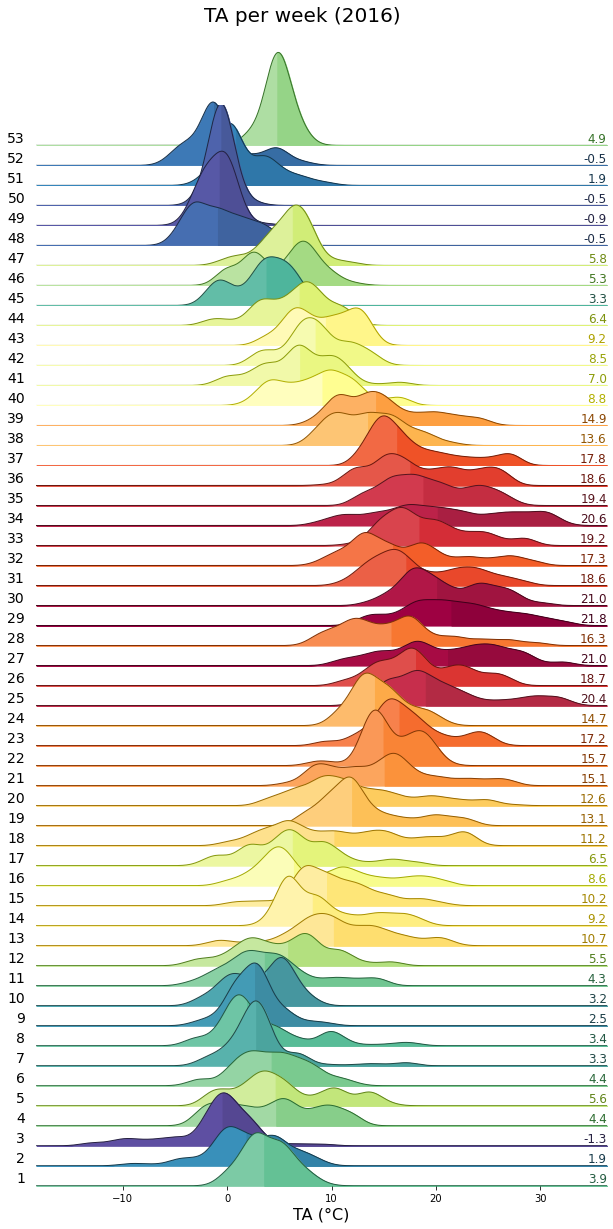

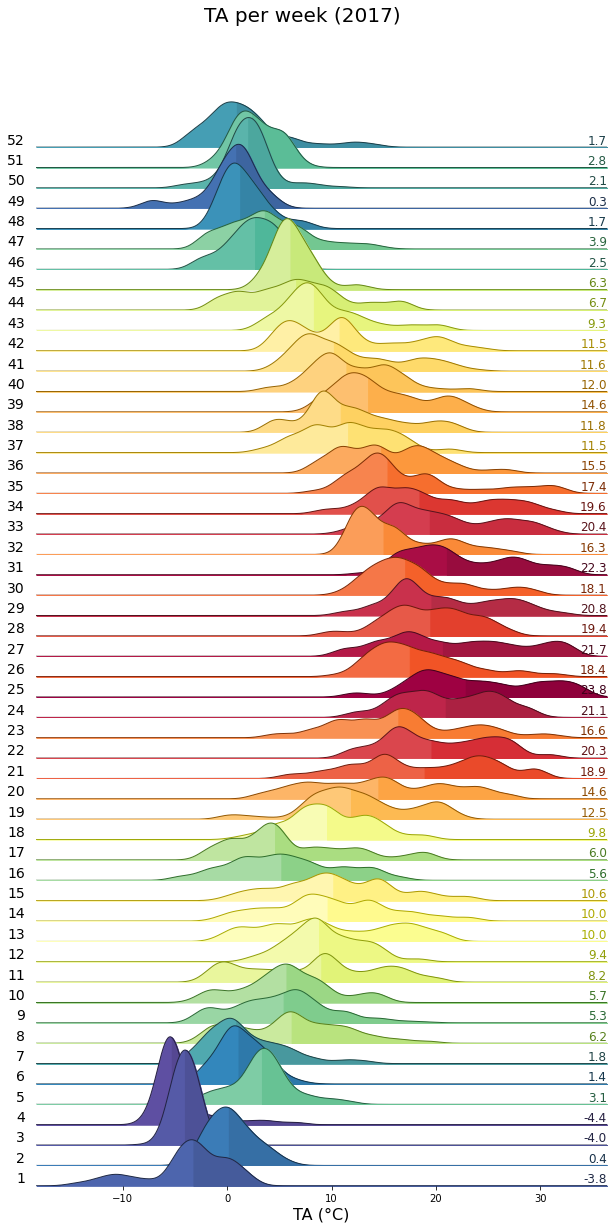

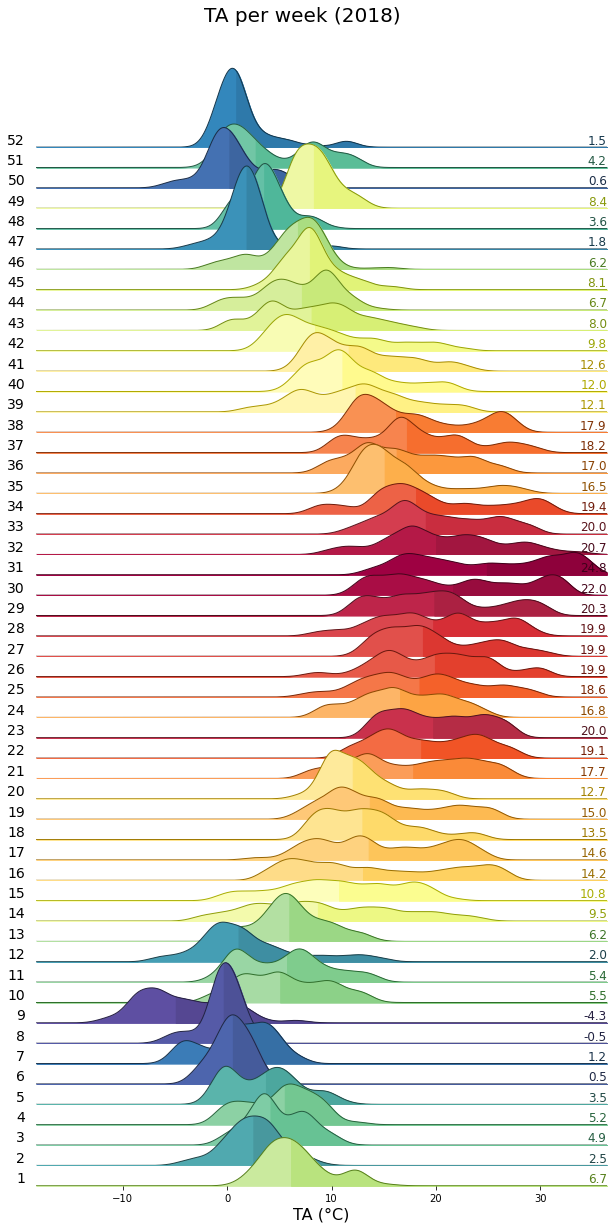

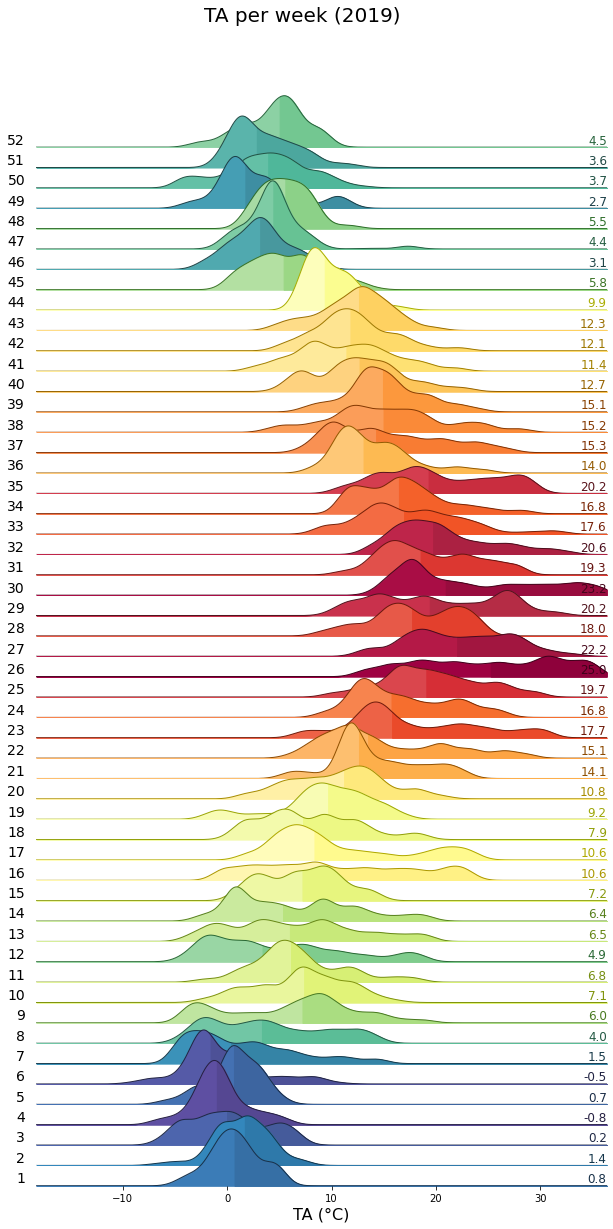

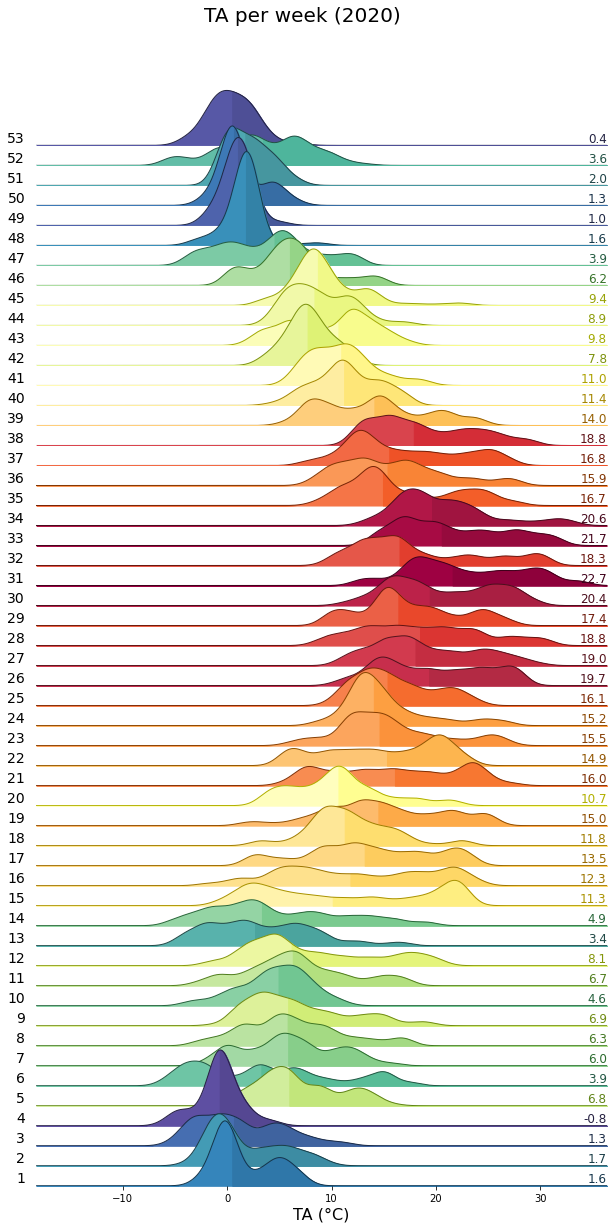

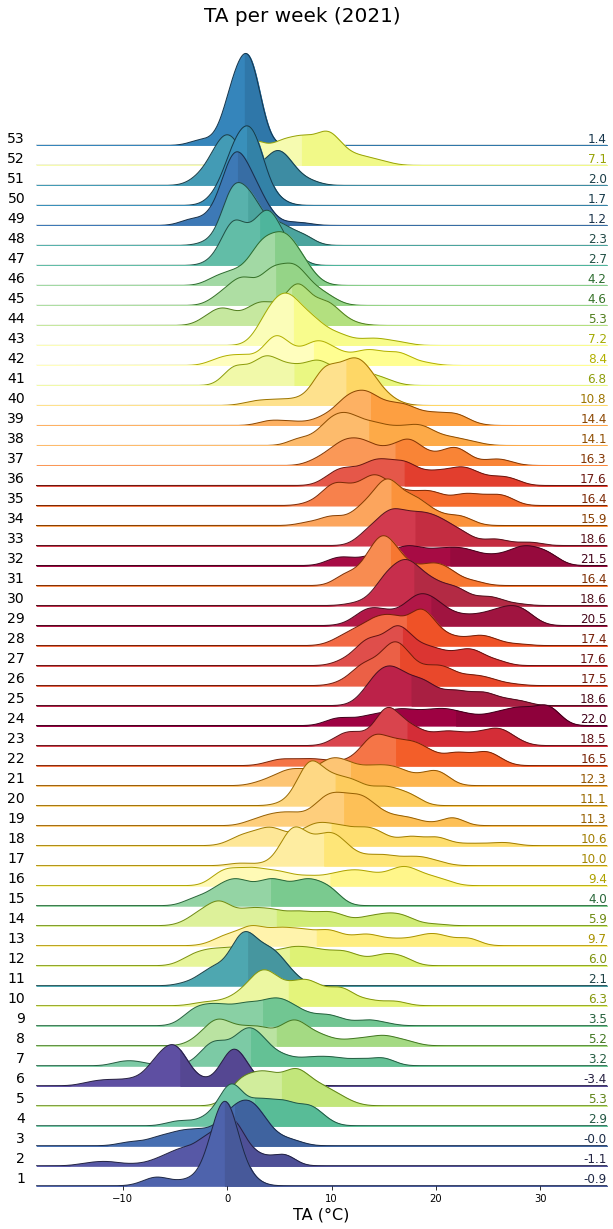

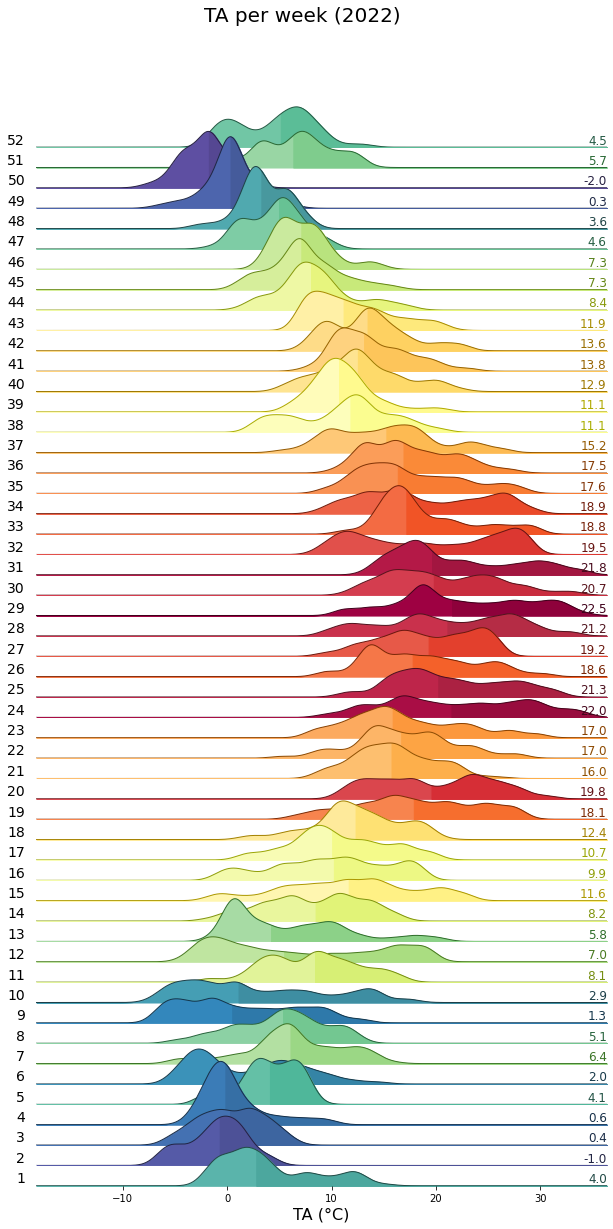

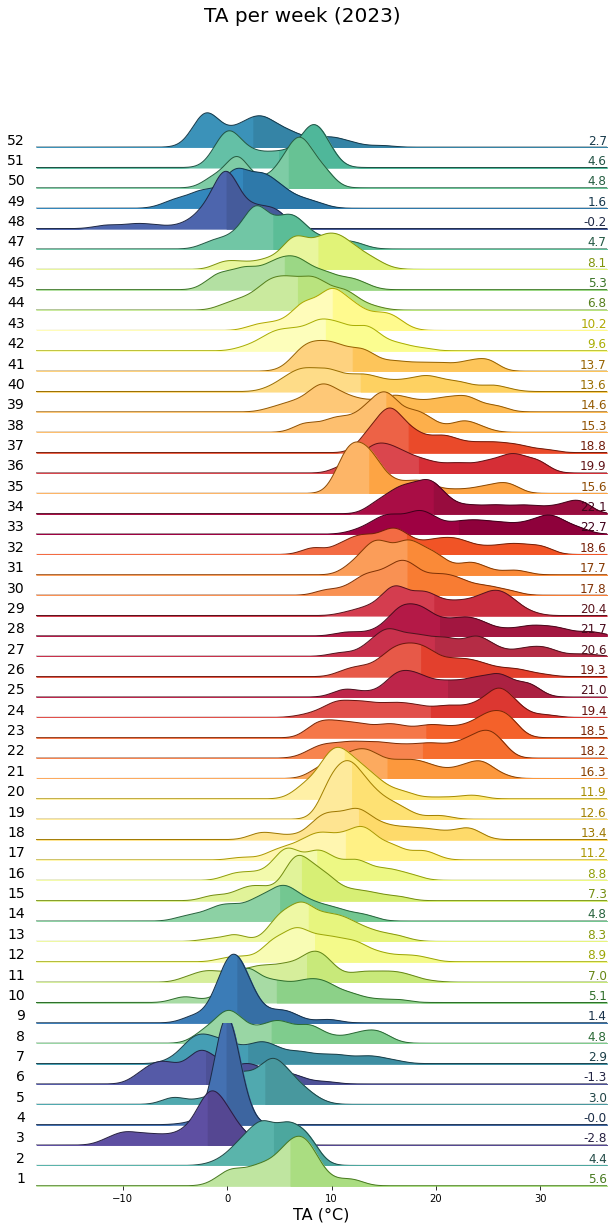

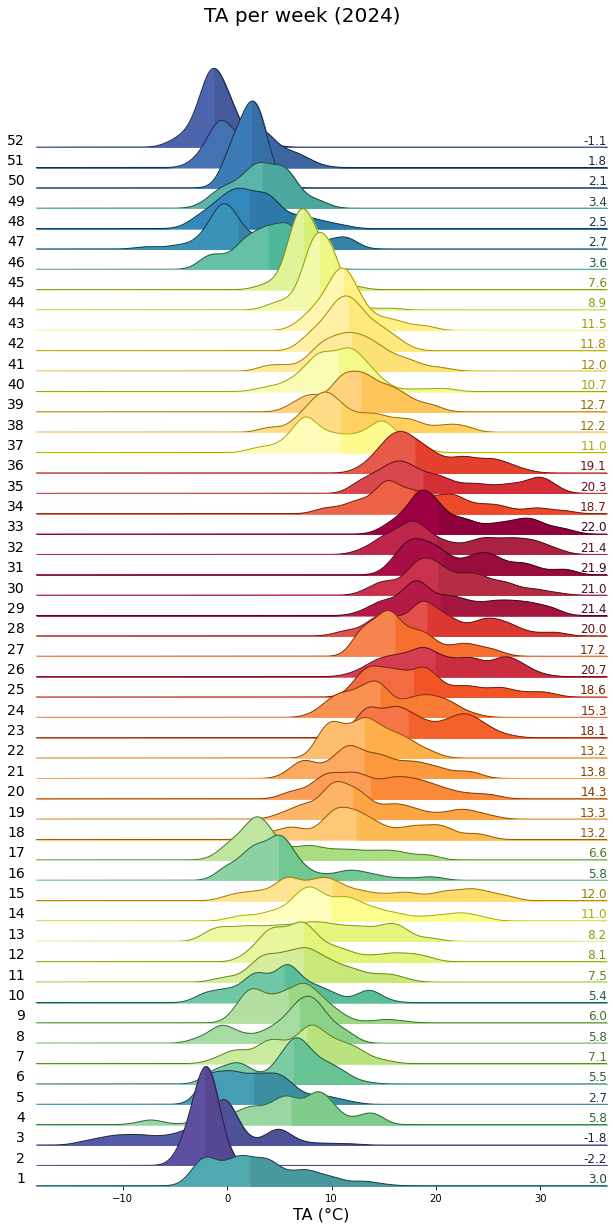

In [42]:
uniq_years = series.index.year.unique()
for uy in uniq_years:
    series_yr = series.loc[series.index.year == uy].copy()
    rp = dv.ridgeline(series=series_yr)
    rp.plot(
        how='weekly',
        kd_kwargs=None,  # params from scikit KernelDensity as dict
        xlim=xlim,  # min/max as list
        ylim=[0, 0.3],  # min/max as list
        hspace=-0.8,  # overlap
        xlabel=f"{var} ({units})",
        fig_width=9,
        fig_height=18,
        shade_percentile=0.5,
        show_mean_line=False,
        fig_title=f"{var} per week ({uy})",
        fig_dpi=72,
        showplot=True,
        ascending=False
    )

</br>

# Cumulative plot

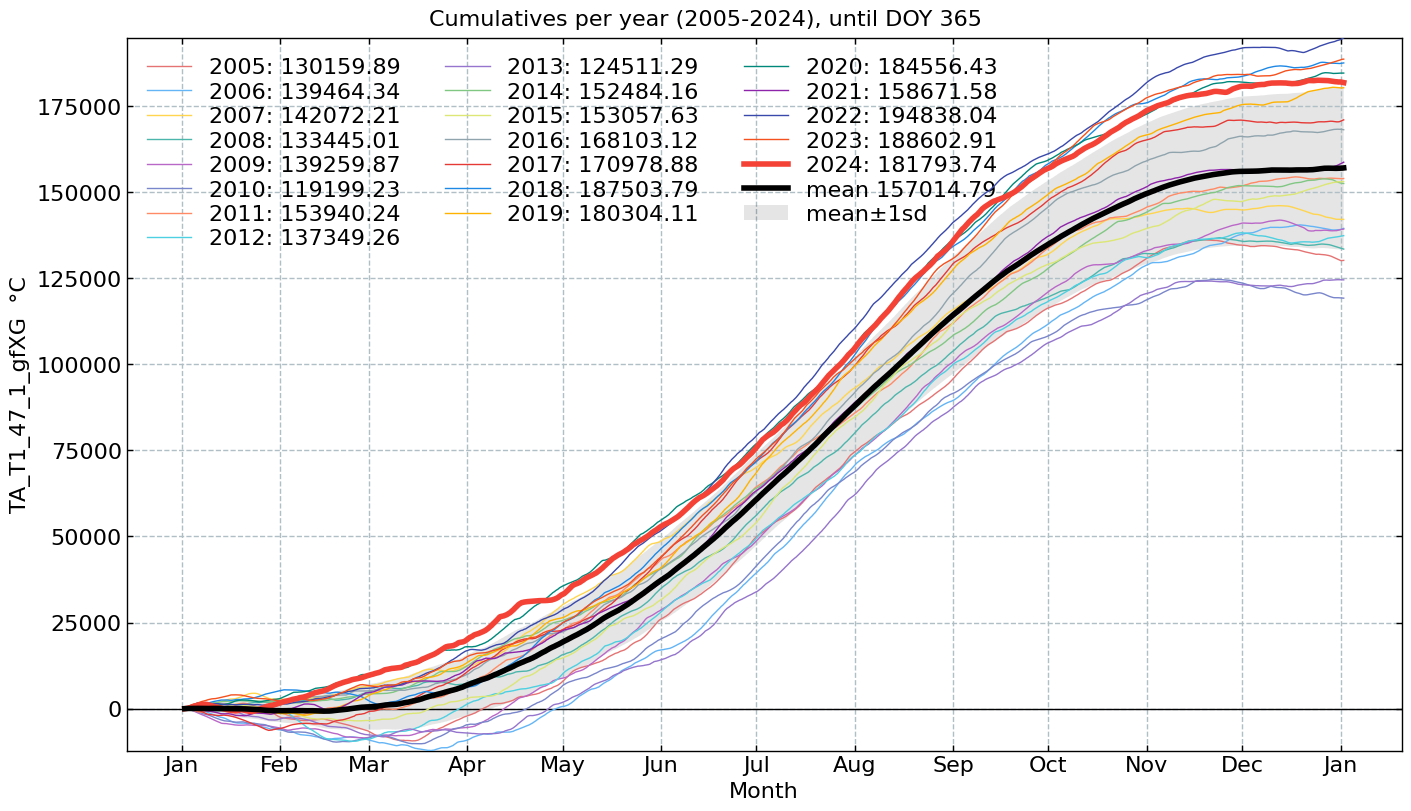

In [36]:
CumulativeYear(
    series=series,
    series_units=units,
    start_year=2005,
    end_year=2024,
    show_reference=True,
    excl_years_from_reference=None,
    highlight_year=2024,
    highlight_year_color='#F44336').plot();

</br>

# Long-term anomalies

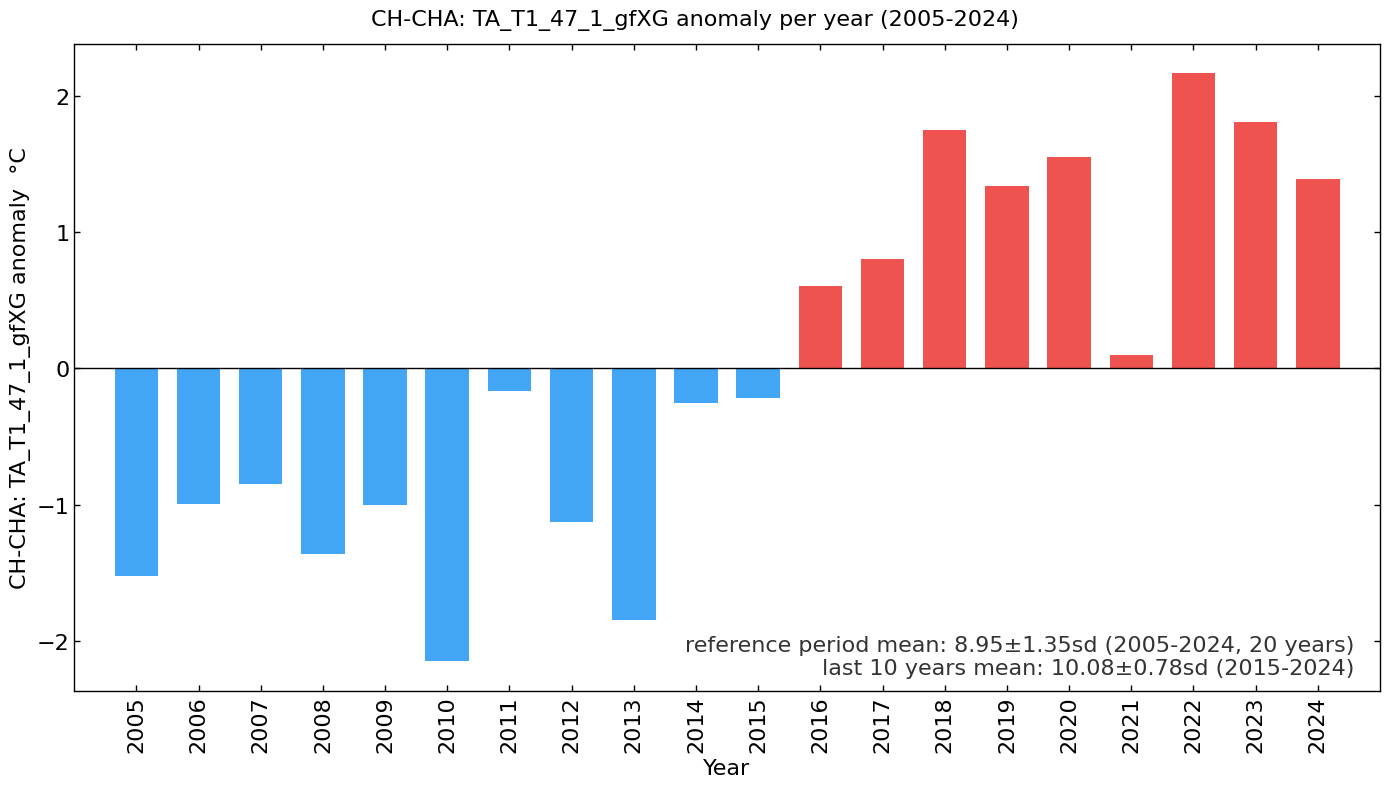

In [37]:
series_yearly_mean = series.resample('YE').mean()
series_yearly_mean.index = series_yearly_mean.index.year
series_label = f"CH-CHA: {varname}"
LongtermAnomaliesYear(series=series_yearly_mean,
                      series_label=series_label,
                      series_units=units,
                      reference_start_year=2005,
                      reference_end_year=2024).plot()

</br>

# End of notebook

In [19]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-06-11 16:45:15
